## SOcial ANalysis (SOAN)

**Goal**  
Political meddaging analysis on a Kenya WhatsApp group

**Project**  
The project started off with basic data analyses, namely getting means and sums of different statistics such as average number of words per message per user and eventually evolved into analyzing topics that were frequently discussed in the group chat. Personally, the most interesting analysis I have done in this project was using TF-IDF as a way to extract words that characterize each person in the group chat. It is interesting to see which words are often used by one person, but rarely by all others. 

Use the table of contents below to go to the analysis of your interest. 

## <a name="table">Table of Contents</a> 

1. [Functions](#functions)

2. [General Statistics](#general)  

    2.1 [Prepare Data](#gs-data)  
        
    2.2 [Users in the Group](#users)
    
    2.3 [Messages over time](#gs-messages)  
    
    2.4 [Active Moments](#gs-active) 
    
    2.5 [Averages / Summaries](#gs-averages) 
    
    2.6 [Response Time](#gs-response) 
    
3. [TF-IDF](#tfidf)  

    3.1 [Count Vector](#tf-count)  

    3.2 [Unique Words](#tf-unique)  

    3.3 [Plot Image](#tf-image)  

4. [Emoji Analysis](#emoji)  

    4.1 [Prepare Data](#emoji-prepare)  

    4.2 [Unique and Common Emojis](#emoji-stats)  

    4.3 [Correlation Matrix](#emoji-corr)  
    
5. [Topic Modelling](#topic)  

    5.1 [Prepare Data](#topic-prepare)  

    5.2 [LDA](#topic-lda)  

    5.3 [NMF](#topic-nmf)  
    
6. [Sentiment Analysis](#sentiment)  

    6.1 [Prepare Data](#sentiment-prepare)  

    6.2 [Average Sentiment](#sentiment-average)  
    
    6.3 [Plot Sentiment](#sentiment-plot)  
    
7. [Word Clouds](#cloud)  

    7.1 [Prepare Data](#cloud-prepare)  

    7.2 [Masked Word Cloud](#cloud-mask)  

    7.3 [Sentiment-based Word Cloud](#cloud-sentiment) 
    
8. [Color Analysis](#color)  

    8.1 [Extract Frequent Colors (k-Means)](#color-get)  

    8.2 [Plot Frequent Colors](#color-plot)  

## <a name="functions">1. Functions</a> 
[Back to Table of Contents](#table)

I purposefully imported all packages manually just to show you which are which and how they work. 

In [2]:
#pip install -r requirements.txt #Install packages
pip install palettable

SyntaxError: invalid syntax (<ipython-input-2-73b1dafb9933>, line 2)

In [2]:
import sys
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allancheboi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allancheboi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <a name="general">2. General Statistics</a> 
[Back to Table of Contents](#table)

Here you can find general data with regards to whatsapp conversations such as the number of messages and words. Keep in mind this is simply to get a general understanding of the conversations. More complex and interesting information can be found in the later chapters. 

#### <a name="gs-data">2.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [38]:
df = helper.import_data('../data/WhatsApp Chat with ODM EMBAKASI CENTRAL.txt')
df = helper.preprocess_data(df)

In [49]:
df.shape

(32817, 8)

#### <a name="users">2.2 Users in the group</a> 
[Back to Table of Contents](#table)

In [50]:
df.head(10)

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week
0,0,"22/12/2020, 01:45 - +254 741 721864: created g...",254 741 721864,"created group ""ODM EMBAKASI CENTRAL""",created group odm embakasi central,2020-12-22 01:45:00,1,1
2247,0,"22/02/2021, 10:36 - +254 729 570423: Correct\n",254 729 570423,Correct,correct,2021-02-22 10:36:00,10,0
2269,0,"22/02/2021, 10:49 - +254 715 163195: *PREPAID ...",254 715 163195,*PREPAID TOKENS*,prepaid tokens,2021-02-22 10:49:00,10,0
2276,0,"22/02/2021, 13:46 - +254 757 445453: All in al...",254 757 445453,"All in all, we've everything about ANN,mara oo...",all in all weve everything about annmara oohni...,2021-02-22 13:46:00,13,0
2326,0,"22/02/2021, 13:48 - +254 701 993009: Give us a...",254 701 993009,Give us a break with ur Ann,give us a break with ur ann,2021-02-22 13:48:00,13,0
5180,0,"22/02/2021, 13:53 - +254 722 146845: Is it the...",254 722 146845,Is it the Anne I know. And why should you be g...,is it the anne i know and why should you be gi...,2021-02-22 13:53:00,13,0
2327,1,"22/02/2021, 15:01 - +254 701 993009: Kwani kun...",254 701 993009,Kwani kuna nini,kwani kuna nini,2021-02-22 15:01:00,15,0
5254,0,"22/02/2021, 15:49 - +254 733 645570: Hello mem...",254 733 645570,Hello members....as we had been updated before...,hello membersas we had been updated before tha...,2021-02-22 15:49:00,15,0
5255,1,"22/02/2021, 19:11 - +254 733 645570: Hello mem...",254 733 645570,Hello members....as we had been updated before...,hello membersas we had been updated before tha...,2021-02-22 19:11:00,19,0
5357,0,"22/02/2021, 19:29 - +254 723 425109: Sirkal us...",254 723 425109,Sirkal usiguse mama yetu,sirkal usiguse mama yetu,2021-02-22 19:29:00,19,0


In [39]:
general.print_users(df)

#############
##  Users  ##
#############

254 741 721864
254 729 570423
254 715 163195
254 757 445453
254 701 993009
254 722 146845
254 733 645570
254 723 425109
254 722 814023
254 741 567284
254 717 035252
254 725 934706
254 706 815482
254 723 899128
254 718 324023
254 762 832945
254 715 137457
254 715 289103
254 723 294919
254 722 231530
254 722 296108
254 702 533144
254 721 216872
254 791 352864
254 701 041411
254 720 335837
254 719 502711
254 777 908740
254 721 275139
254 720 866698
254 708 051047
254 722 952023
254 702 511417
254 715 305077
254 722 470148
254 787 008541
254 720 832627
254 728 146512
254 728 494433
254 727 229597
254 799 650891
254 713 755851
254 746 821405
254 725 830840
254 702 631655
254 722 439990
254 741 278429
254 724 757669
254 722 596780
254 720 684097
254 728 136526
254 791 400594
254 702 672935
254 743 926005
254 712 031172
254 743 736230
254 725 568877
254 748 644723
254 710 611175
254 741 721864
254 722 363052
254 757 183505
254 724 275513
254 737 8632

In [1]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
media_messages

NameError: name 'df' is not defined

#### <a name="gs-messages">2.3 Messages over time</a> 
[Back to Table of Contents](#table)

In [59]:
user = "254 741 567284"

IndexError: list index out of range

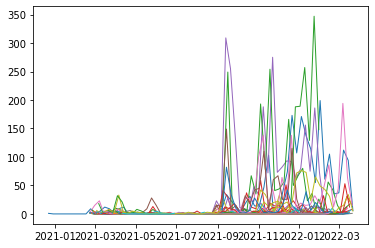

In [62]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a name="gs-active">2.4 Active Moments</a> 
[Back to Table of Contents](#table)

**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

IndexError: list index out of range

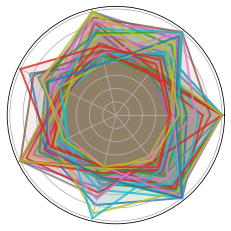

In [41]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (7).

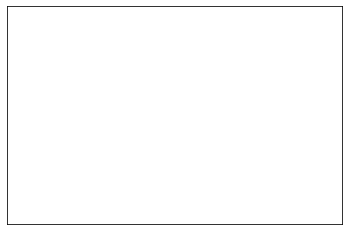

In [63]:
general.plot_active_days(df, savefig=False, dpi=100, user='Me')

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

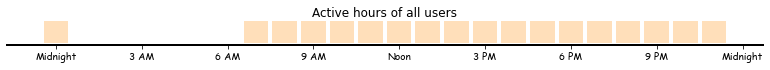

In [64]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

**Calendar Map**  
Here you can choose for which year you want to see the activity

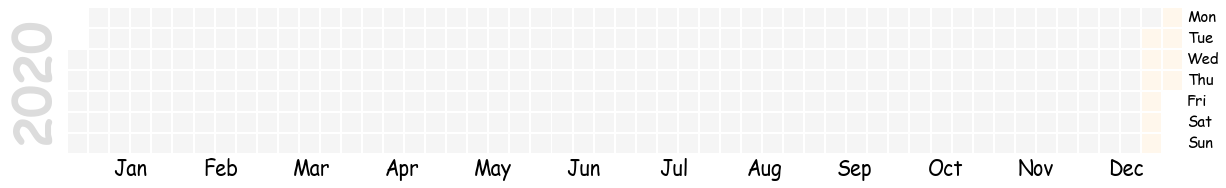

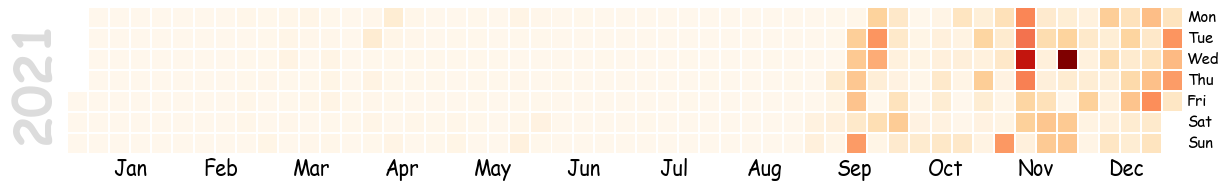

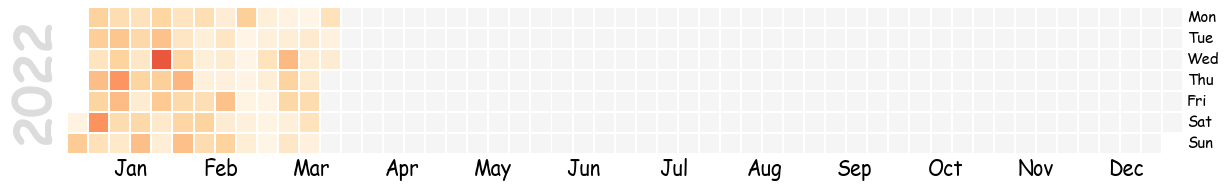

In [65]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

#### <a name="gs-averages">2.5 Averages / Summaries</a> 
[Back to Table of Contents](#table)

Here you can find general averages and summaries. For those that are interested how often a person said "I love you", you can also find that. 

In [66]:
general.print_stats(df, love=True)

##########################
##  Number of Messages  ##
##########################

1904	254 741 721864
15	254 729 570423
3	254 715 163195
48	254 757 445453
2371	254 701 993009
49	254 722 146845
92	254 733 645570
72	254 723 425109
8	254 722 814023
6	254 741 567284
17	254 717 035252
3	254 725 934706
1549	254 706 815482
392	254 723 899128
164	254 718 324023
5	254 762 832945
12	254 715 137457
40	254 715 289103
18	254 723 294919
67	254 722 231530
22	254 722 296108
6	254 702 533144
32	254 721 216872
3	254 791 352864
46	254 701 041411
91	254 720 335837
2	254 719 502711
2	254 777 908740
247	254 721 275139
47	254 720 866698
6	254 708 051047
11	254 722 952023
164	254 702 511417
200	254 715 305077
8	254 722 470148
2	254 787 008541
1212	254 720 832627
9	254 728 146512
45	254 728 494433
24	254 727 229597
4	254 799 650891
1	254 713 755851
4	254 746 821405
37	254 725 830840
2	254 702 631655
1	254 722 439990
58	254 741 278429
2	254 724 757669
173	254 722 596780
1	254 720 684097
1	254 728 136526
7	254 7

7	254 721 815694
2	254 748 058837
1	254 102808393
1	254 713 400030
1	254 791 627757
1	254 113211084
6	254 714 588072
1	254 714 091889
1	254 725 596603
1	254 799 995318

#######################
##  Number of Words  ##
#######################

12371	254 741 721864
112	254 729 570423
17	254 715 163195
2659	254 757 445453
14022	254 701 993009
408	254 722 146845
2255	254 733 645570
925	254 723 425109
19	254 722 814023
10	254 741 567284
281	254 717 035252
6	254 725 934706
23647	254 706 815482
5934	254 723 899128
2400	254 718 324023
20	254 762 832945
161	254 715 137457
717	254 715 289103
885	254 723 294919
1101	254 722 231530
279	254 722 296108
15	254 702 533144
520	254 721 216872
210	254 791 352864
430	254 701 041411
615	254 720 335837
11	254 719 502711
11	254 777 908740
1393	254 721 275139
635	254 720 866698
26	254 708 051047
86	254 722 952023
1102	254 702 511417
1253	254 715 305077
51	254 722 470148
27	254 787 008541
12332	254 720 832627
18	254 728 146512
257	254 728 494433
285	254 727 229

6	254 714 381082
6	254 723 930170
10	254 795 018217
44	254 722 999364
111	254 723 171196
6	254 722 322807
6	254 789 609795
5	254 728 259996
28	254 724 930403
7	254 702 191617
8413	254 790 622951
16	254 795 696667
270	254 712 650001
11	254 713 315353
653	254 115492660
577	254 799 755739
3	254 762 147944
25	254 702 657794
223	254 706 329174
21	254 703 589122
2	254 715 678820
960	254 791 627757
7	254 113599261
12	254 113898141
7	254 745 745443
6	254 775 539915
1	254 782 160420
6	254 722 736618
387	254 707 468899
240	254 721 815694
2	254 748 058837
4	254 102808393
3	254 713 400030
3	254 791 627757
3	254 113211084
25	254 714 588072
6	254 714 091889
6	254 725 596603
3	254 799 995318

#########################
##  Messages per hour  ##
#########################

254 741 721864:	0.1738177834580975
254 729 570423:	0.006708407871198569
254 715 163195:	0.005893909626719057
254 757 445453:	0.0050772159932303785
254 701 993009:	0.2821275583055688
254 722 146845:	0.007474069554606467
254 733 645570:

ZeroDivisionError: division by zero

#### <a name="gs-response">2.6 Response Time</a> 
[Back to Table of Contents](#table)

**keep_order = True** maintains the order of messages in the dataframe which is neccesary in order to calculate the response time between messages. However, it is more time-consuming which is why I created a separate function for this. 

In [67]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

254 715 163195:               183.5
254 757 445453:               57.49
254 701 993009:               6.26
254 722 146845:               23.48
254 733 645570:               97.29
254 723 425109:               65.22
254 722 814023:               39.12
254 741 567284:               73.33
254 717 035252:               138.47
254 725 934706:               17.0
254 706 815482:               7.28
254 723 899128:               19.09
254 741 721864:               15.01
254 718 324023:               16.81
254 762 832945:               189.0
254 715 137457:               153.91
254 715 289103:               105.86
254 722 231530:               6.49
254 722 296108:               4.74
254 702 533144:               253.75
254 729 570423:               107.09
254 721 216872:               24.77
254 791 352864:               161.0
254 701 041411:               68.87
254 719 502711:      

254 715 996775:               28.0
254 725 381046:               6.62
254 796 867753:               6.5
254 724 979509:               9.33
254 723 244061:               7.0
254 727 767664:               2.5
254 727 931386:               4.0
254 720 799031:               2.0
254 780 249960:               7.18
254 722 167334:               157.33
254 726 721119:               93.0
254 720 221324:               19.33
254 729 969613:               10.81
254 743 486120:               1.3
254 713 930660:               13.0
254 727 155359:               17.56
254 724 040815:               14.5
254 722 363052:               10.0
254 718 118039:               38.0
254 728 665918:               74.0
254 748 082057:               11.5
254 794 333601:               37.0
254 723 587010:               6.5
254 721 553828:               47.33
254 703 574413:               23.5
254 712 387212:               23.0
254 724 813726:               5.97
254 725 003519:               10.0
254 775 800155:      

254 729 481260:               1		(10.0% of all messages)
254 725 272744:               1		(50.0% of all messages)


## <a name="tfidf">3. TF-IDF</a> 
[Back to Table of Contents](#table)

#### <a name="tf-count">3.1 Create Count Vector</a> 
[Back to Table of Contents](#table)

It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [68]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language=language, column="Word")

#### <a name="tf-unique">3.2 Unique Words</a> 
[Back to Table of Contents](#table)

Below you can see three version of TF-IDF that I created. After much experimentation it turns out that they are all quite similar and that Version C gives me a nice distribution of values needed for the plotting. Content-wise they all have a very similar meaning. 

**Version A - Messages**  
  
$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} m_i}{m_i} $  
  
$t_{ij} = $ Number of times word $j$ said by $i$   
$m_i = $ Number of messages texted by $i$  
  

**Version B - Words**

$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} w_i}{w_i}$

$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$w_i = $ Number of words texted by $i$


**Version C - Adjusted TF-IDF**

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$m = $ Number of all messages   

** Unique Words **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $


In [ ]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

#### <a name="tf-image">3.3 Plot Image</a> 
[Back to Table of Contents](#table)

This is where things got a bit tricky...

I created a horizontal bar chart with two bars stacked on top of each other both plotted on a background image. I started with a background image and plotted the actual values on the left and made it fully transparent with a white border to separate the bars. Then, on top of that I plotted which bars so that the right part of the image would get removed. 

In [ ]:
tf_idf.print_users(df)

**Instructions**  
Make sure to change "user" in the function below to one of the users as seen above. It needs to be the exact same naming otherwise it will not work. Furthermore, a valid picture needs to be selected. You can choose the sizing yourself which might need some experimenting with before finding the right size. It also works with a link to the image online. 

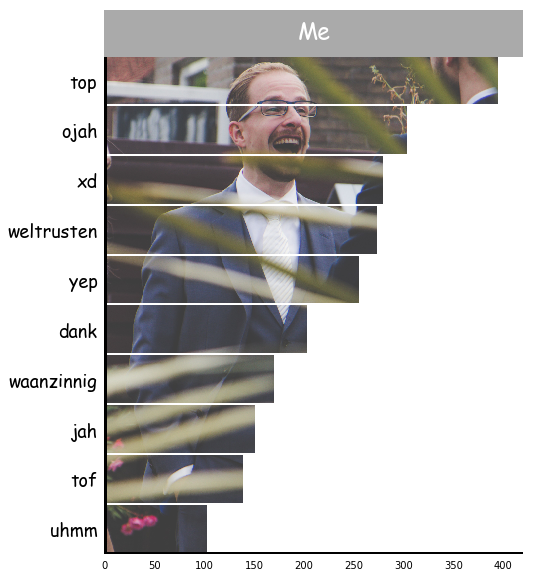

In [15]:
tf_idf.plot_unique_words(unique_words, 
                         user='Me', 
                         image_path='../images/mask.jpg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Me", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

## <a name="emoji">4. Emoji Analysis</a> 
[Back to Table of Contents](#table)

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user
* Highly correlated Emoji per user

#### <a name="emoji-prepare">4.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data needs to be prepared as follows:
* Three new columns are created:
    * *Emoji* contains all emojis in a message
    * *Emoji_Counts* counts the number of emojis in a message
    * *Different_Emojis* extracts them in a list for handling purposes
* *counts* is a dictionary of dictionaries containing the count of each emoji per user
* *unique_emoji* is a dict of dicts containing a uniqueness score of each emoji per user compared to other users

In [77]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#### <a name="emoji-stats">4.2 Unique and Common Emoji</a> 
[Back to Table of Contents](#table)

Below you can find the most unique emojis according to the TF-IDF and Unique formulas that were used previously: 

** TF-IDF **

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific emoji $j$ was said by $i$  
$m = $ Number of all messages  

** Unique Emoji **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $

I purposefully based it on the number of words and messages in total and only changed *t* to the number of times emoji was said

In [78]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Her
🥰 49.24386951631036
❤ 41.159055118110295
😬 37.48413948256473

Me
:P 91.15855524946392
😃 70.40977961432498
:) 36.735537190082674

#########################
### Most Common Emoji ###
#########################

Her
😊 904
😘 460
😚 298

Me
😊 487
😁 285
😃 206



**NOTE:** The often used emoji does not always properly get displayed in matplotlib plots, not sure how to fix this currently...

C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend

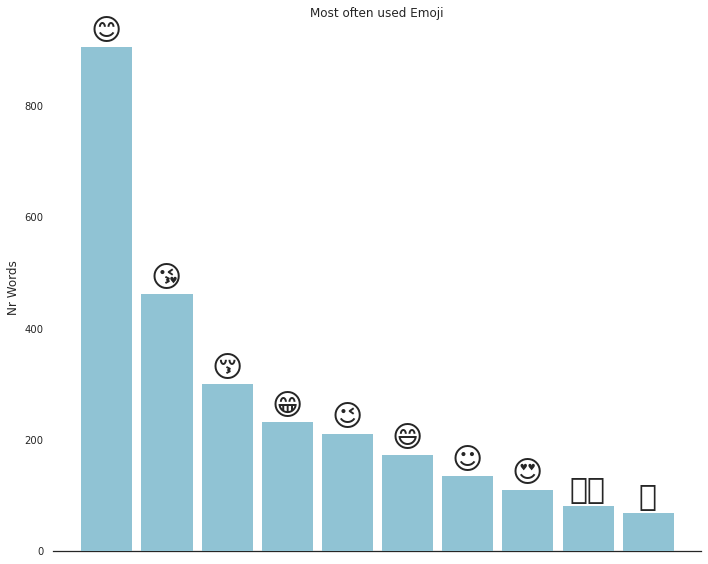

In [79]:
emoji.plot_counts(counts, user = user)

#### <a name="emoji-corr">4.3 Correlation Matrix</a> 
[Back to Table of Contents](#table)

Below you find a correlation matrix of the 15 most often used emoji by a single user. The reasoning for only taking 15 emojis is that otherwise the matrix simply becomes too big. 

C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Maarten\.conda\envs\soan\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


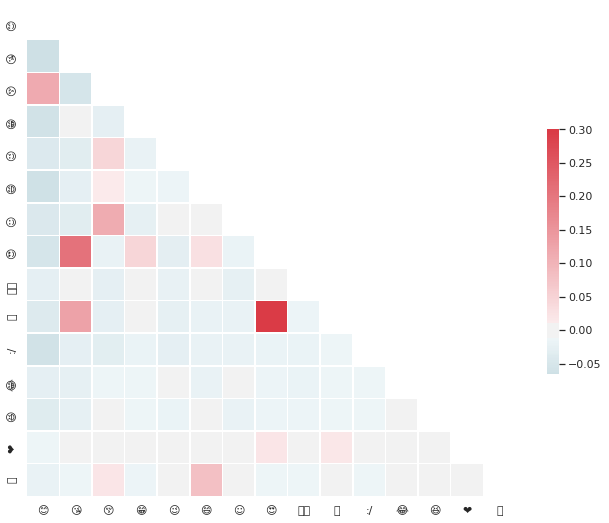

In [80]:
emoji.plot_corr_matrix(df, user, list_of_words, counts)

## <a name="topic">5. Topic Modelling</a> 
[Back to Table of Contents](#table)

#### <a name="topic-prepare">5.1 Prepare Data</a> 
[Back to Table of Contents](#table)


#### <a name="topic-lda">5.2 LDA </a> 
[Back to Table of Contents](#table)

There is an abundance of methods with regards to topic modelling. Two, however, seem to be the most used: LDA and NMF. Sklearn has an implementation of both LDA and NMF which is why I used that. It should be noted that Gensim is also an extremely good package when it comes to NLP. I will be using Gensim later below for a different application. 

In [81]:
topic.topics(df, model='lda', language="dutch")

###########
### Her ###
###########


Topics in lda model:
Topic #0: straks nee hoor niks goed uhm poepie
Topic #1: ok we schat love eten mag even
Topic #2: goed ga dankjewel jou lekker morgen weer
Topic #3: wel oke leuk inderdaad doe fijn denk
Topic #4: schattie jij thuis even bent fijn hey

##########
### Me ###
##########


Topics in lda model:
Topic #0: dank top minuten fiets strakjes bent jij
Topic #1: we trouwens ojah jij laat halen alleen
Topic #2: wel goed haha even we leuk super
Topic #3: lieverd ga thuis boodschappen hey nodig goed
Topic #4: love you mila we precies afspraak mail



#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)

An application of the NMF model used for topic modelling. 

In [82]:
topic.topics(df, model='nmf', language="dutch")

###########
### Her ###
###########


Topics in nmf model:
Topic #0: ok straks poepie schat voorzichtig geef doe
Topic #1: oke doe oh schatje straks fijn haal
Topic #2: schattie fijn thuis gezellig hey bent leuk
Topic #3: dankjewel lieverd jij slaap lekker morgen poepie
Topic #4: goed hoor nee jij wel straks ga

##########
### Me ###
##########


Topics in nmf model:
Topic #0: ga boodschappen nodig lieverd halen uurtje half
Topic #1: thuis wel goed haha lekker we morgen
Topic #2: lieverd dank hey fijn allerliefste plezier verwacht
Topic #3: gezellig jeey super jeeeey erg hartstikke samen
Topic #4: love you most more schattie much very



## <a name="sentiment">6. Sentiment</a> 
[Back to Table of Contents](#table)

#### <a name="sentiment-prepare">6.1 Prepare Data</a> 
[Back to Table of Contents](#table)

Fortunately, in order to extract sentiment from a Dutch message you can extract the score (-1 being negative and 1 being positive) easily using the pattern package. Below I extract the sentiment as a new column which is needed for further analysis. 

In [83]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

#### <a name="sentiment-average">6.2 Average Sentiment Per User</a> 
[Back to Table of Contents](#table)

Prints the average sentiment per user to get an indication of positivity of that user. 

*NOTE*: THIS ONLY WORKS FOR DUTCH!

In [84]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Her:                          		0.288
Me:                           		0.296





#### <a name="sentiment-plot">6.3 Plot Sentiment</a> 
[Back to Table of Contents](#table)

Below you can see a plot of how positive the messages are over time. The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

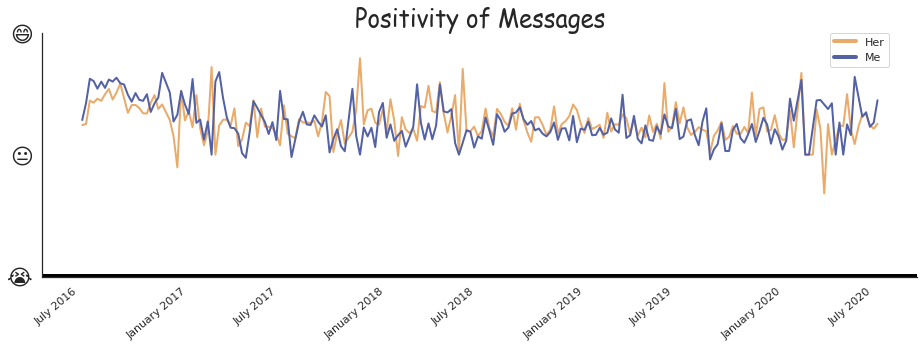

In [85]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

## <a name="cloud">7. Word Clouds</a> 
[Back to Table of Contents](#table)

#### <a name="cloud-prepare">7.1 Prepare Data</a> 
[Back to Table of Contents](#table)

In [86]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="dutch", column="Word")
words = counts[["Word", user]].set_index('Word').to_dict()[user]

#### <a name="cloud-mask">7.2 Masked Word Cloud</a> 
[Back to Table of Contents](#table)

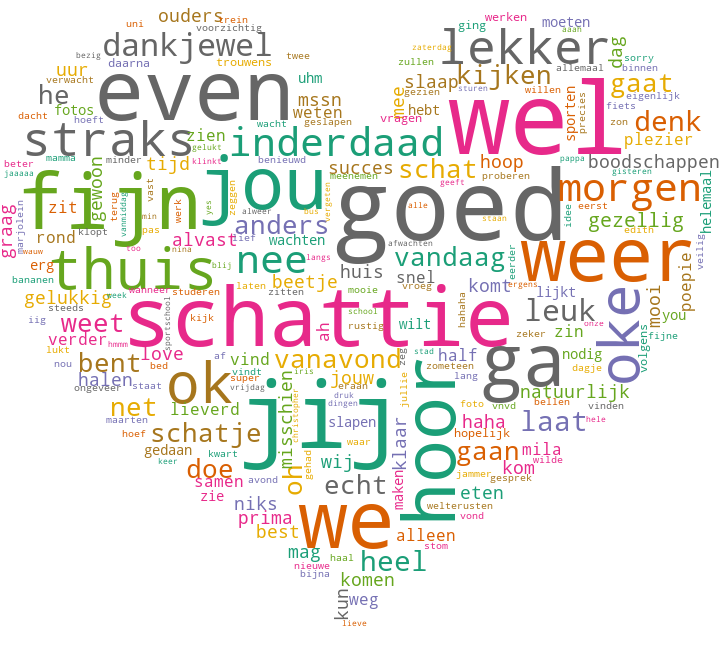

In [87]:
wordcloud.create_wordcloud(words,random_state=42, mask="../images/heart.jpg",
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)

## <a name="color">8. Picture Analysis</a> 
[Back to Table of Contents](#table)

NOTE: This is not part of the whatsapp data. For this chapter to work, you'll need to put at least 1 image in the folder 'Images/' or create a path of your own. It is set to not run automatically since this is merely an extra feature. Set run_colors to True if you want to run the script. 

#### <a name="color-get">8.1 Extract Frequent Colors (k-Means)</a> 
[Back to Table of Contents](#table)

In [32]:
import os
import pickle

Below is the code to retrieve and dump the top 5 most frequent colors in an image using k-Means. 
It works as follows, each pixel in an image has its own color. That color of each pixel in an image is then extracted in an rgb format. This allows each pixel to have an x (r), y (g) and z (b) coordinate. After extracting all colors of each pixel, k-Means (with k=5) is then used to cluster the points into 5 colors. For each cluster the mediod is calculated and used as a representative of that cluster. Thus, you get top 5 colors for each image. 

In [33]:
extract_colors = False

if extract_colors:
    # Get Top 5 Frequent Colors
    path = 'Images/'
    all_colors = [colors.get_common_colors(path + i) for i in os.listdir(path)]

    # Save colors
    with open('colors.pkl', 'wb') as f:
        pickle.dump(all_colors, f)

#### <a name="color-plot">8.2 Plot Frequent Colors</a> 
[Back to Table of Contents](#table)

After getting the top 5 colors for each picture, they are counted and then displayed below in a histogram. The histogram is in a circular shape where larger/bigger/higher bars indicate colors that are more frequent in the set of pictures. There is a version of the histogram that only shows bars and one that shows a smoothened histogram to be more visually pleasing. 

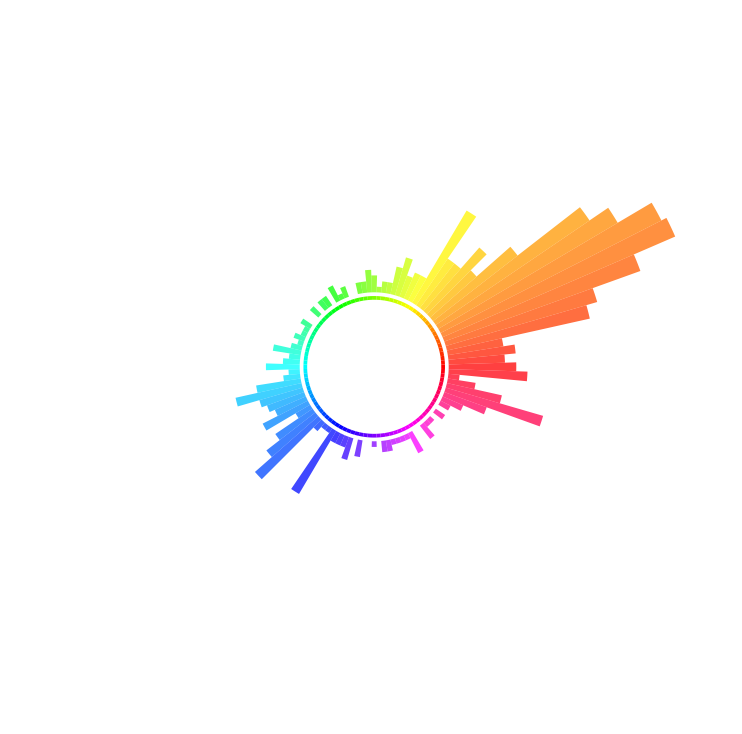

In [34]:
colors.plot_color('colors.pkl', smoothen=False, savefig=False)

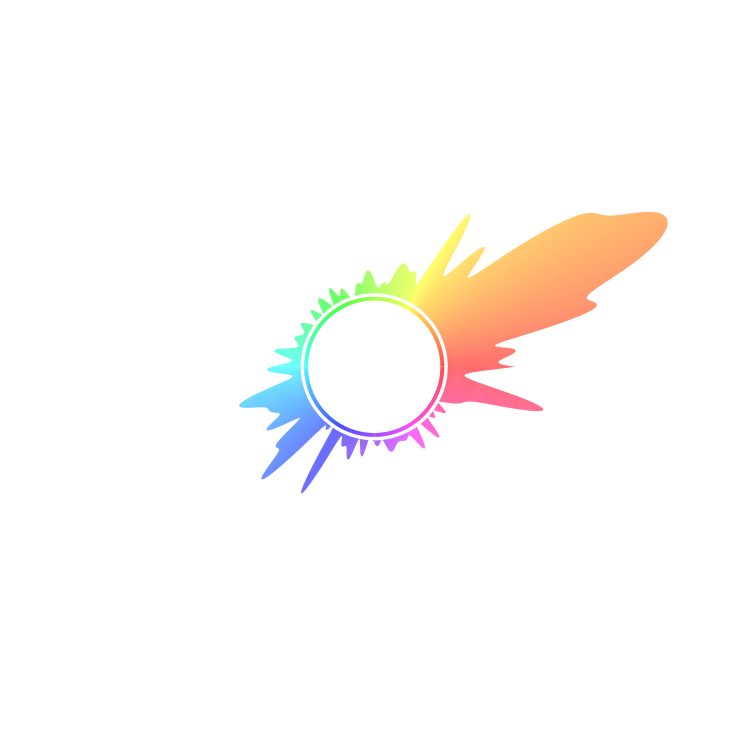

In [35]:
colors.plot_color('colors.pkl', smoothen=True, savefig=False)